In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import datasets

In [2]:
linnerud = datasets.load_linnerud()

In [3]:
linnerud

{'data': array([[  5., 162.,  60.],
        [  2., 110.,  60.],
        [ 12., 101., 101.],
        [ 12., 105.,  37.],
        [ 13., 155.,  58.],
        [  4., 101.,  42.],
        [  8., 101.,  38.],
        [  6., 125.,  40.],
        [ 15., 200.,  40.],
        [ 17., 251., 250.],
        [ 17., 120.,  38.],
        [ 13., 210., 115.],
        [ 14., 215., 105.],
        [  1.,  50.,  50.],
        [  6.,  70.,  31.],
        [ 12., 210., 120.],
        [  4.,  60.,  25.],
        [ 11., 230.,  80.],
        [ 15., 225.,  73.],
        [  2., 110.,  43.]]),
 'feature_names': ['Chins', 'Situps', 'Jumps'],
 'target': array([[191.,  36.,  50.],
        [189.,  37.,  52.],
        [193.,  38.,  58.],
        [162.,  35.,  62.],
        [189.,  35.,  46.],
        [182.,  36.,  56.],
        [211.,  38.,  56.],
        [167.,  34.,  60.],
        [176.,  31.,  74.],
        [154.,  33.,  56.],
        [169.,  34.,  50.],
        [166.,  33.,  52.],
        [154.,  34.,  64.],
        

In [4]:
df = pd.DataFrame(linnerud.data, columns=linnerud.feature_names)

In [5]:
df.head()

,Chins,Situps,Jumps
0,5.0,162.0,60.0
1,2.0,110.0,60.0
2,12.0,101.0,101.0
3,12.0,105.0,37.0
4,13.0,155.0,58.0


In [6]:
df.columns

Index(['Chins', 'Situps', 'Jumps'], dtype='object')

In [7]:
df.isna().sum()

Chins     0
Situps    0
Jumps     0
dtype: int64

In [8]:
df.shape

(20, 3)

In [9]:
df[['Weight', 'Waist', 'Pulse']] = linnerud.target

In [10]:
df.head()

,Chins,Situps,Jumps,Weight,Waist,Pulse
0,5.0,162.0,60.0,191.0,36.0,50.0
1,2.0,110.0,60.0,189.0,37.0,52.0
2,12.0,101.0,101.0,193.0,38.0,58.0
3,12.0,105.0,37.0,162.0,35.0,62.0
4,13.0,155.0,58.0,189.0,35.0,46.0


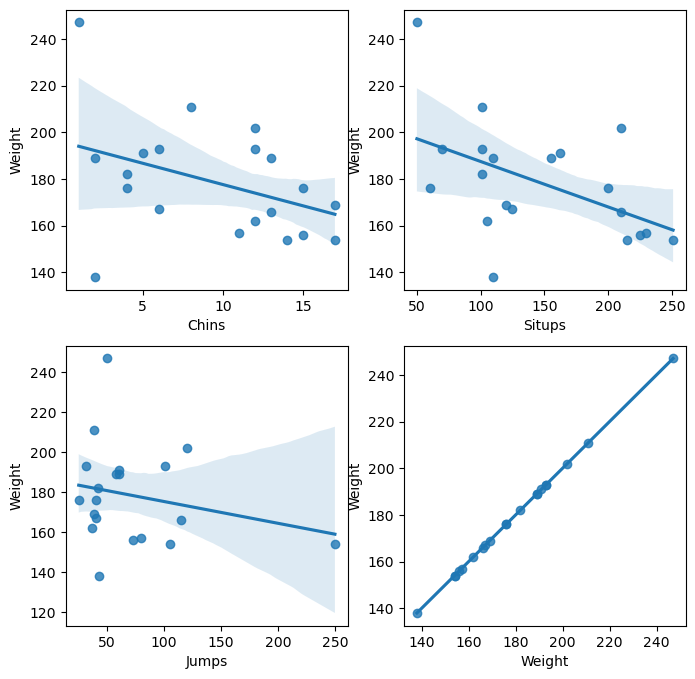

In [11]:
fig, axs = plt.subplots(figsize=(8,8), ncols=2, nrows=2)

lm_features = ['Chins', 'Situps', 'Jumps', 'Weight']

for i, feature in enumerate(lm_features):
    row = int(i/2)
    col = i%2

    sns.regplot(x=feature, y='Weight', data=df, ax=axs[row][col])

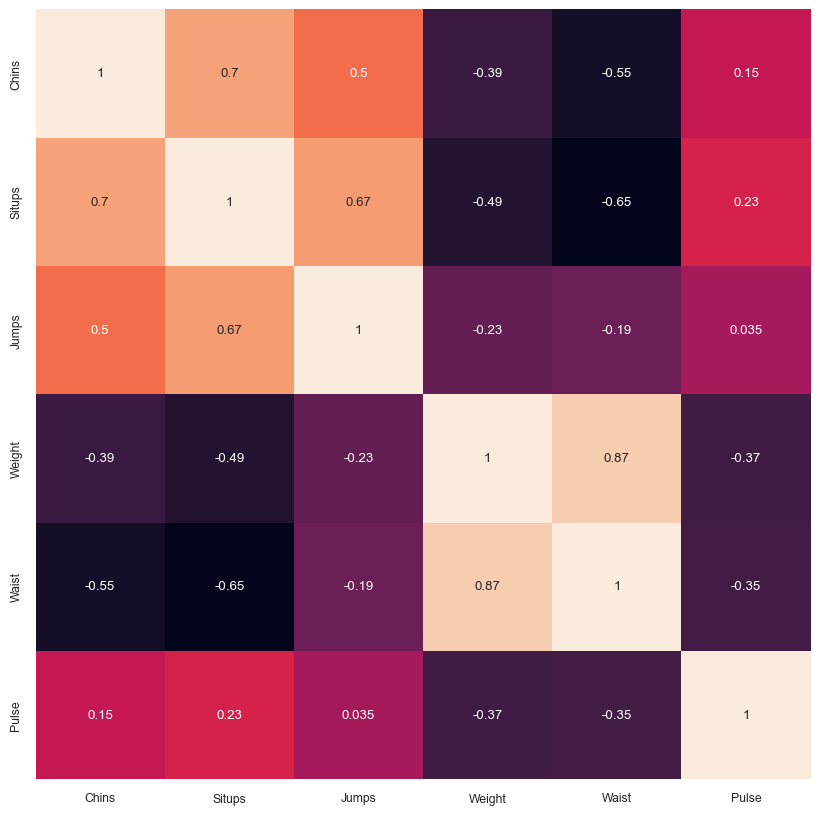

In [12]:
# Heatmap

df_corr=df.corr()

plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

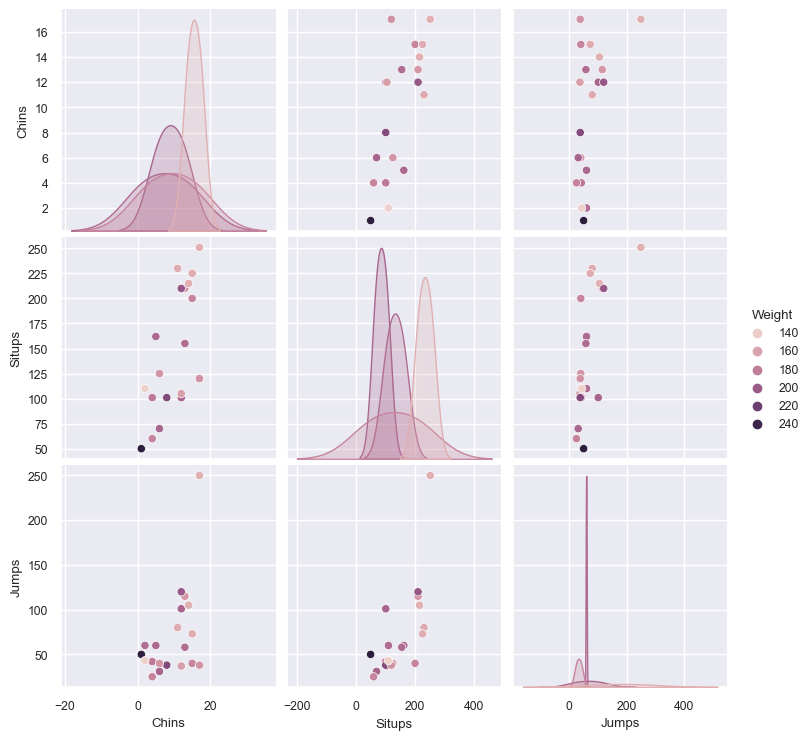

In [13]:
# EDA

sns.pairplot(df,
             vars=['Chins', 'Situps', 'Jumps'],
            hue ='Weight')
plt.show()

In [14]:
x_data=df.loc[:, ['Chins', 'Situps', 'Jumps']]
y_data=df.loc[:, 'Weight']

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(x_data, y_data, test_size=0.25, random_state=12)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(15, 3) (15,)
(5, 3) (5,)


In [16]:
X_train.head()

,Chins,Situps,Jumps
16,4.0,60.0,25.0
10,17.0,120.0,38.0
8,15.0,200.0,40.0
5,4.0,101.0,42.0
4,13.0,155.0,58.0


In [17]:
y_train.head()

16    176.0
10    169.0
8     176.0
5     182.0
4     189.0
Name: Weight, dtype: float64

In [18]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [19]:
print("회귀계수(기울기):", np.round(lr.coef_, 1)) #np: numpy, coef_: 피처에 대한 회귀 계수 값
print("상수항(절편):", np.round(lr.intercept_, 1))  #intercept_: 상수항(절편) 값

회귀계수(기울기): [-1.  -0.1  0.2]
상수항(절편): 199.3


In [20]:
y_preds = lr.predict(X_test)
print(X_train.shape, X_test.shape)

(15, 3) (5, 3)


In [21]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
print(f'MSE : {mse:.3f}, RMSE: {rmse:.3f}')
print(f'Variance score : {r2_score(y_test, y_preds):.3f}')

MSE : 1264.513, RMSE: 35.560
Variance score : 0.130


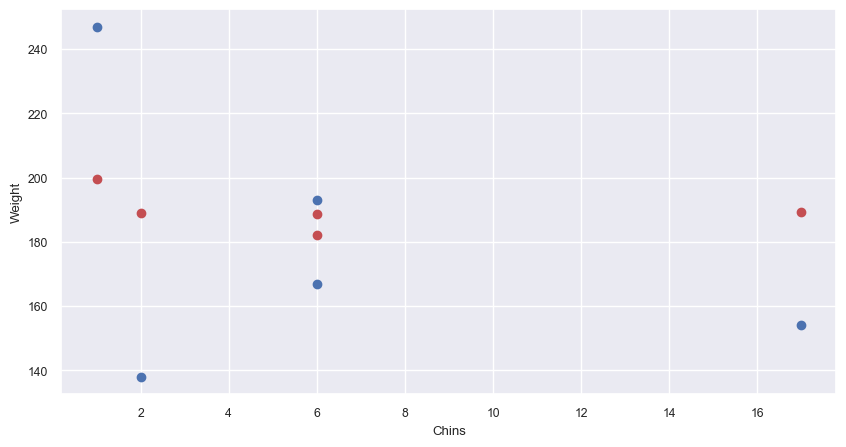

In [22]:
plt.figure(figsize=(10,5))
plt.xlabel('Chins')
plt.ylabel('Weight')
plt.scatter(X_test['Chins'], y_test, label='y_test')
plt.scatter(X_test['Chins'], y_preds, c='r', label='y_preds')
plt.show()   

In [23]:
# SVR

from sklearn.svm import SVR

model = SVR()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

sy_preds = model.predict(X_test)
mse = np.sqrt(mean_squared_error(sy_preds, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 38.09129695705647


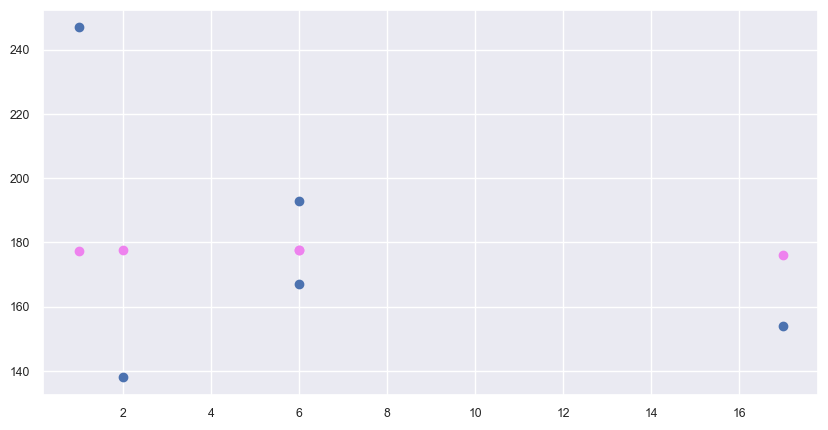

In [24]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['Chins'], y_test, label='y_test')
plt.scatter(X_test['Chins'], sy_preds, c='violet', label='sy_preds')
plt.show()

In [25]:
# DT

from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

dy_preds = model.predict(X_test)
mse = np.sqrt(mean_squared_error(dy_preds, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 36.56227564033727


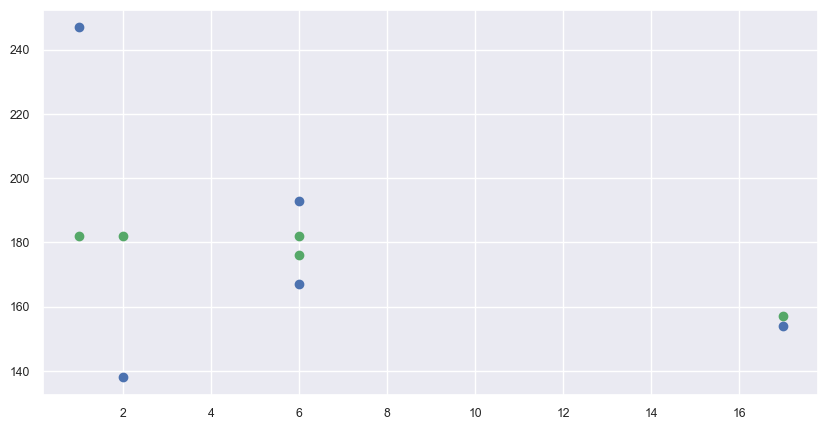

In [26]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['Chins'], y_test, label='y_test')
plt.scatter(X_test['Chins'], dy_preds, c='g', label='dy_preds')
plt.show() 

In [27]:
# RT

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test)
mse = np.sqrt(mean_squared_error(ry_preds, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 37.25234891922924


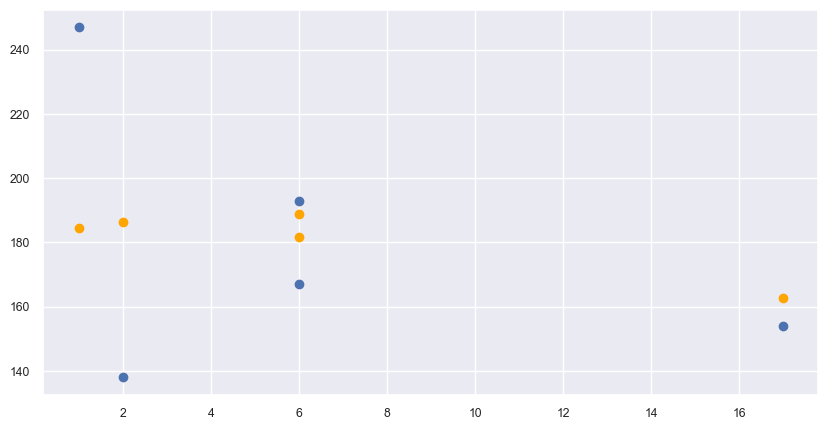

In [28]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['Chins'], y_test, label='y_test')
plt.scatter(X_test['Chins'], ry_preds, c='orange', label='ry_preds')
plt.show() 

In [29]:
# LR

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ly_preds = model.predict(X_test)
mse = np.sqrt(mean_squared_error(ly_preds, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 35.55999602974209


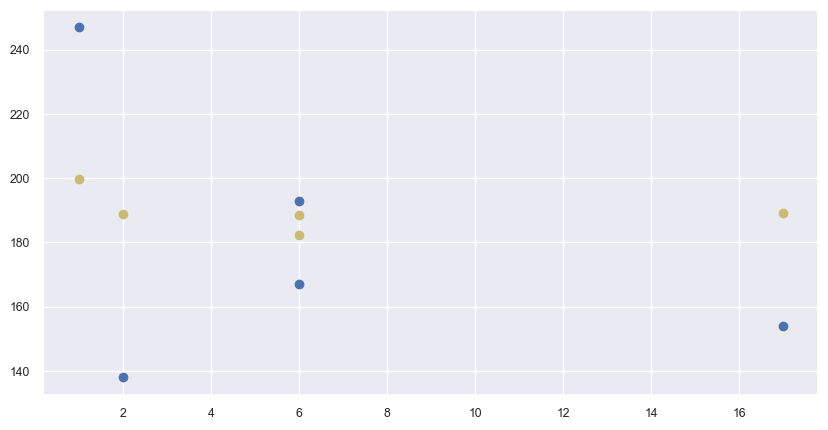

In [30]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['Chins'], y_test, label='y_test')
plt.scatter(X_test['Chins'], ly_preds, c='y', label='ly_preds')
plt.show()

In [31]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=5, include_bias=False)
train_poly = poly.fit_transform(X_train)
test_poly = poly.transform(X_test)
print(train_poly.shape)
print(test_poly.shape)

(15, 55)
(5, 55)


In [32]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [33]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, y_train)
print(ridge.score(train_scaled, y_train))

0.6585036496627492


In [34]:
print(ridge.score(test_scaled, y_test))

-101.67370996077487


In [35]:
import matplotlib.pyplot as plt

train_score = []
test_score = []

In [36]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list :
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_scaled, y_train)
    train_score.append(ridge.score(train_scaled, y_train))
    test_score.append(ridge.score(test_scaled, y_test))

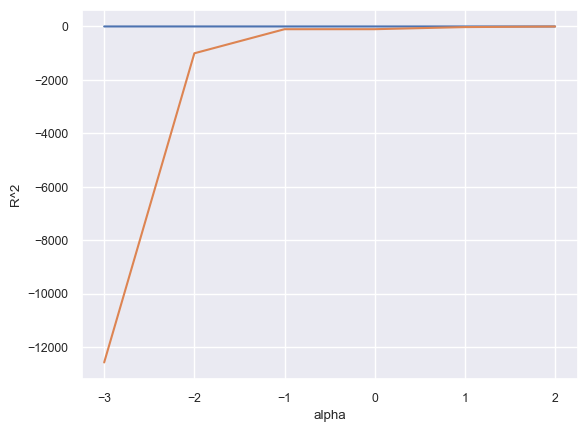

In [37]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [38]:
ridge = Ridge(alpha=100)
ridge.fit(train_scaled, y_train)
print(ridge.score(train_scaled, y_train))
print(ridge.score(test_scaled, y_test))

0.36514074282968034
-1.5201098081723576


In [39]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, y_train)
print(lasso.score(train_scaled, y_train))
print(lasso.score(test_scaled, y_test))

0.5155062193332645
-89.46813146397339


In [40]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(train_scaled, y_train)
    train_score.append(lasso.score(train_scaled, y_train))
    test_score.append(lasso.score(test_scaled, y_test))

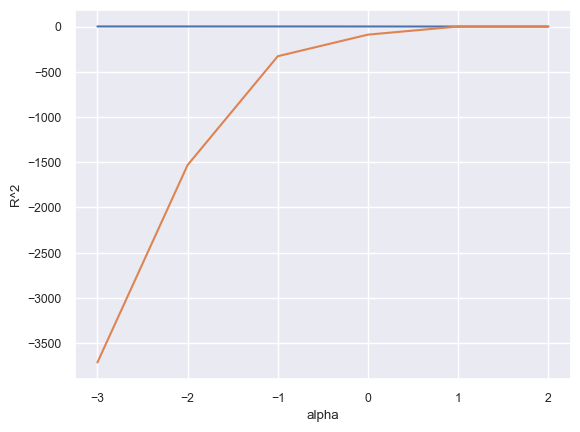

In [41]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [42]:
lasso = Lasso(alpha=1)
lasso.fit(train_scaled, y_train)
print(lasso.score(train_scaled, y_train))
print(lasso.score(test_scaled, y_test))

0.5155062193332645
-89.46813146397339


In [43]:
print(np.sum(lasso.coef_ == 0))

51
